<a href="https://colab.research.google.com/github/P-shyam17/GCI/blob/master/M_lw_r3_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# os reads file and directory structure
# numpy for matrix math outside tf
# matplotlib.pyplot to plot graph and display images


import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt

# commandline interface
import argparse

In [ ]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount = True)

Mounted at /gdrive


In [ ]:
data = '/gdrive/MyDrive/data' 

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(150, 150),
  batch_size=32)

Found 1096 files belonging to 2 classes.
Using 877 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(150, 150),
  batch_size=32)



Found 1096 files belonging to 2 classes.
Using 219 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['benign', 'malicious']


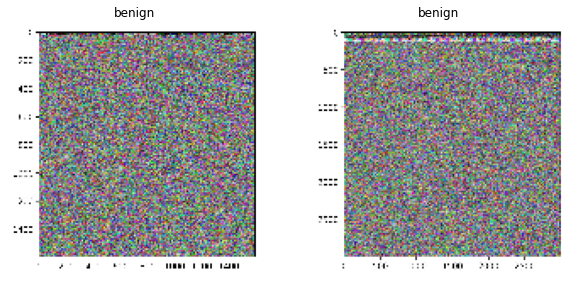

In [ ]:

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(2):
    ax = plt.subplot(1, 2, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [ ]:
num_classes = len(class_names)

In [ ]:
Model = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(150, 150, 3)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])

In [ ]:
Model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       7

In [ ]:
epochs=32
history = Model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/32
28/28 [==============================] - 112s 4s/step - loss: 0.6297 - accuracy: 0.6727 - val_loss: 0.5067 - val_accuracy: 0.8037
Epoch 2/32
28/28 [==============================] - 1s 31ms/step - loss: 0.3546 - accuracy: 0.8575 - val_loss: 0.4110 - val_accuracy: 0.8219
Epoch 3/32
28/28 [==============================] - 1s 29ms/step - loss: 0.2934 - accuracy: 0.8871 - val_loss: 0.3496 - val_accuracy: 0.8630
Epoch 4/32
28/28 [==============================] - 1s 28ms/step - loss: 0.2367 - accuracy: 0.9076 - val_loss: 0.3203 - val_accuracy: 0.8539
Epoch 5/32
28/28 [==============================] - 1s 29ms/step - loss: 0.2131 - accuracy: 0.9099 - val_loss: 0.3059 - val_accuracy: 0.8721
Epoch 6/32
28/28 [==============================] - 1s 29ms/step - loss: 0.1855 - accuracy: 0.9373 - val_loss: 0.2573 - val_accuracy: 0.8950
Epoch 7/32
28/28 [==============================] - 1s 29ms/step - loss: 0.1665 - accuracy: 0.9384 - val_loss: 0.2868 - val_accuracy: 0.8858
Epoch 8/32
28

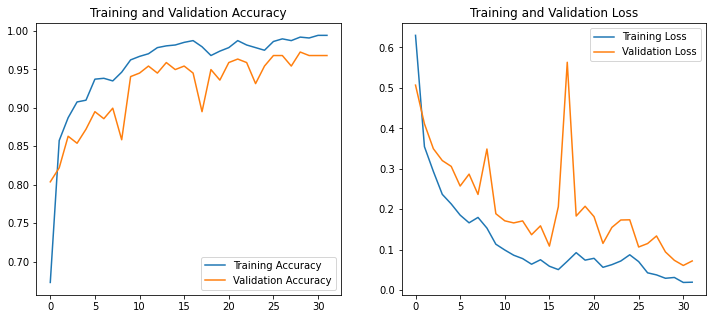

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:


trial_path = '/gdrive/MyDrive/MAL_FINAL.png'

img = tf.keras.utils.load_img(
    trial_path, target_size=(150, 150)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = Model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


1/1 [==============================] - 0s 342ms/step
This image most likely belongs to malicious with a 100.00 percent confidence.


(-0.5, 149.5, 149.5, -0.5)

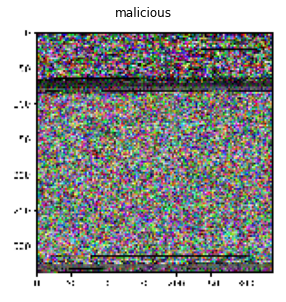

In [ ]:
plt.figure(figsize=(5, 5))
  
plt.imshow(img)
plt.title(class_names[np.argmax(score)])
plt.axis("off")


In [ ]:
trial_path = '/gdrive/MyDrive/BENIGN_FINAL.png'

img = tf.keras.utils.load_img(
    trial_path, target_size=(150, 150)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = Model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


1/1 [==============================] - 0s 25ms/step
This image most likely belongs to benign with a 100.00 percent confidence.


(-0.5, 149.5, 149.5, -0.5)

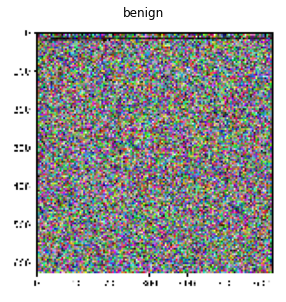

In [ ]:
plt.figure(figsize=(5, 5))
  
plt.imshow(img)
plt.title(class_names[np.argmax(score)])
plt.axis("off")